#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarning = 'True'

In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


#Reading and Understanding Data

In [3]:
leads_data = pd.read_csv('/content/Leads.csv')
leads_data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
# There are 9240 rows and 37 columns in this dataset
leads_data.shape

(9240, 37)

In [5]:
#Checking info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Descriptive Statistics
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#Data Cleaning

As it can be observe that there are many columns with select as value this is because the customer didn't make a selection from the list of options. To handle these "Select" values, we can replace them with NaN

In [7]:
leads_data = leads_data.replace('Select', np.nan)

In [8]:
#Checking null values in our dataset
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are many missing values in our data

In [9]:
#Checking null percentage in our dataset
null_percentage = round(leads_data.isnull().sum()/len(leads_data.isnull())*100,2)
null_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping columns with more than 45% missing values
# Retaining the 'Lead Quality' column since it captures subjective lead quality assessments by employees

cols_to_drop = [col for col in leads_data.columns if col != 'Lead Quality' and null_percentage[col] >= 45]
leads_data.drop(cols_to_drop, axis=1, inplace=True)


In [11]:
round(leads_data.isnull().sum()/len(leads_data.isnull())*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
#Dropping Duplicates
leads_data = leads_data.drop_duplicates()
leads_data.shape

(9240, 31)

In [13]:
leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [14]:
# Let's replace missing values in country with India as it is for most values
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

In [15]:
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

We are replacing missing values in the 'Specialization' column with 'Other' due to the high percentage of missing data (36%) in this column. Imputing with 'Other' allows us to retain these records while clearly indicating that these values were filled in due to the absence of specific specialization information.

In [16]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Others')

In [17]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
#Unemployed" is the most common occupation in our dataset, we can consider imputing the missing values with "Unemployed.
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [19]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
#Since "Better Career Prospects" is the most common choice in our dataset, we can consider imputing the missing values with "Better Career Prospects.
leads_data["What matters most to you in choosing a course"].fillna("Better Career Prospects", inplace=True)


In [21]:
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [22]:
#We can consider imputing the missing values with the mode (most frequent category) in the "Tags" column.
leads_data["Tags"].fillna(leads_data["Tags"].mode()[0], inplace=True)


In [23]:
leads_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
#We can consider imputing the missing values with the mode (most frequent category) in the "City" column
leads_data["City"].fillna(leads_data["City"].mode()[0], inplace=True)


In [25]:
#Checking Value counts
leads_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [26]:
#Imputing missing values
leads_data["Lead Quality"].fillna(leads_data["Lead Quality"].mode()[0], inplace=True)

In [27]:
round(leads_data.isnull().sum()/len(leads_data.isnull())*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [28]:
# Dropped columns with less than 2% missing values to simplify the dataset and minimize impact on analysis.
leads_data.dropna(inplace = True)

In [29]:
#There are no missing values now
round(leads_data.isnull().sum()/len(leads_data.isnull())*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [30]:
#Checking the shape after dealing with missing values
leads_data.shape

(9074, 31)

#EDA

# Univariate Analysis

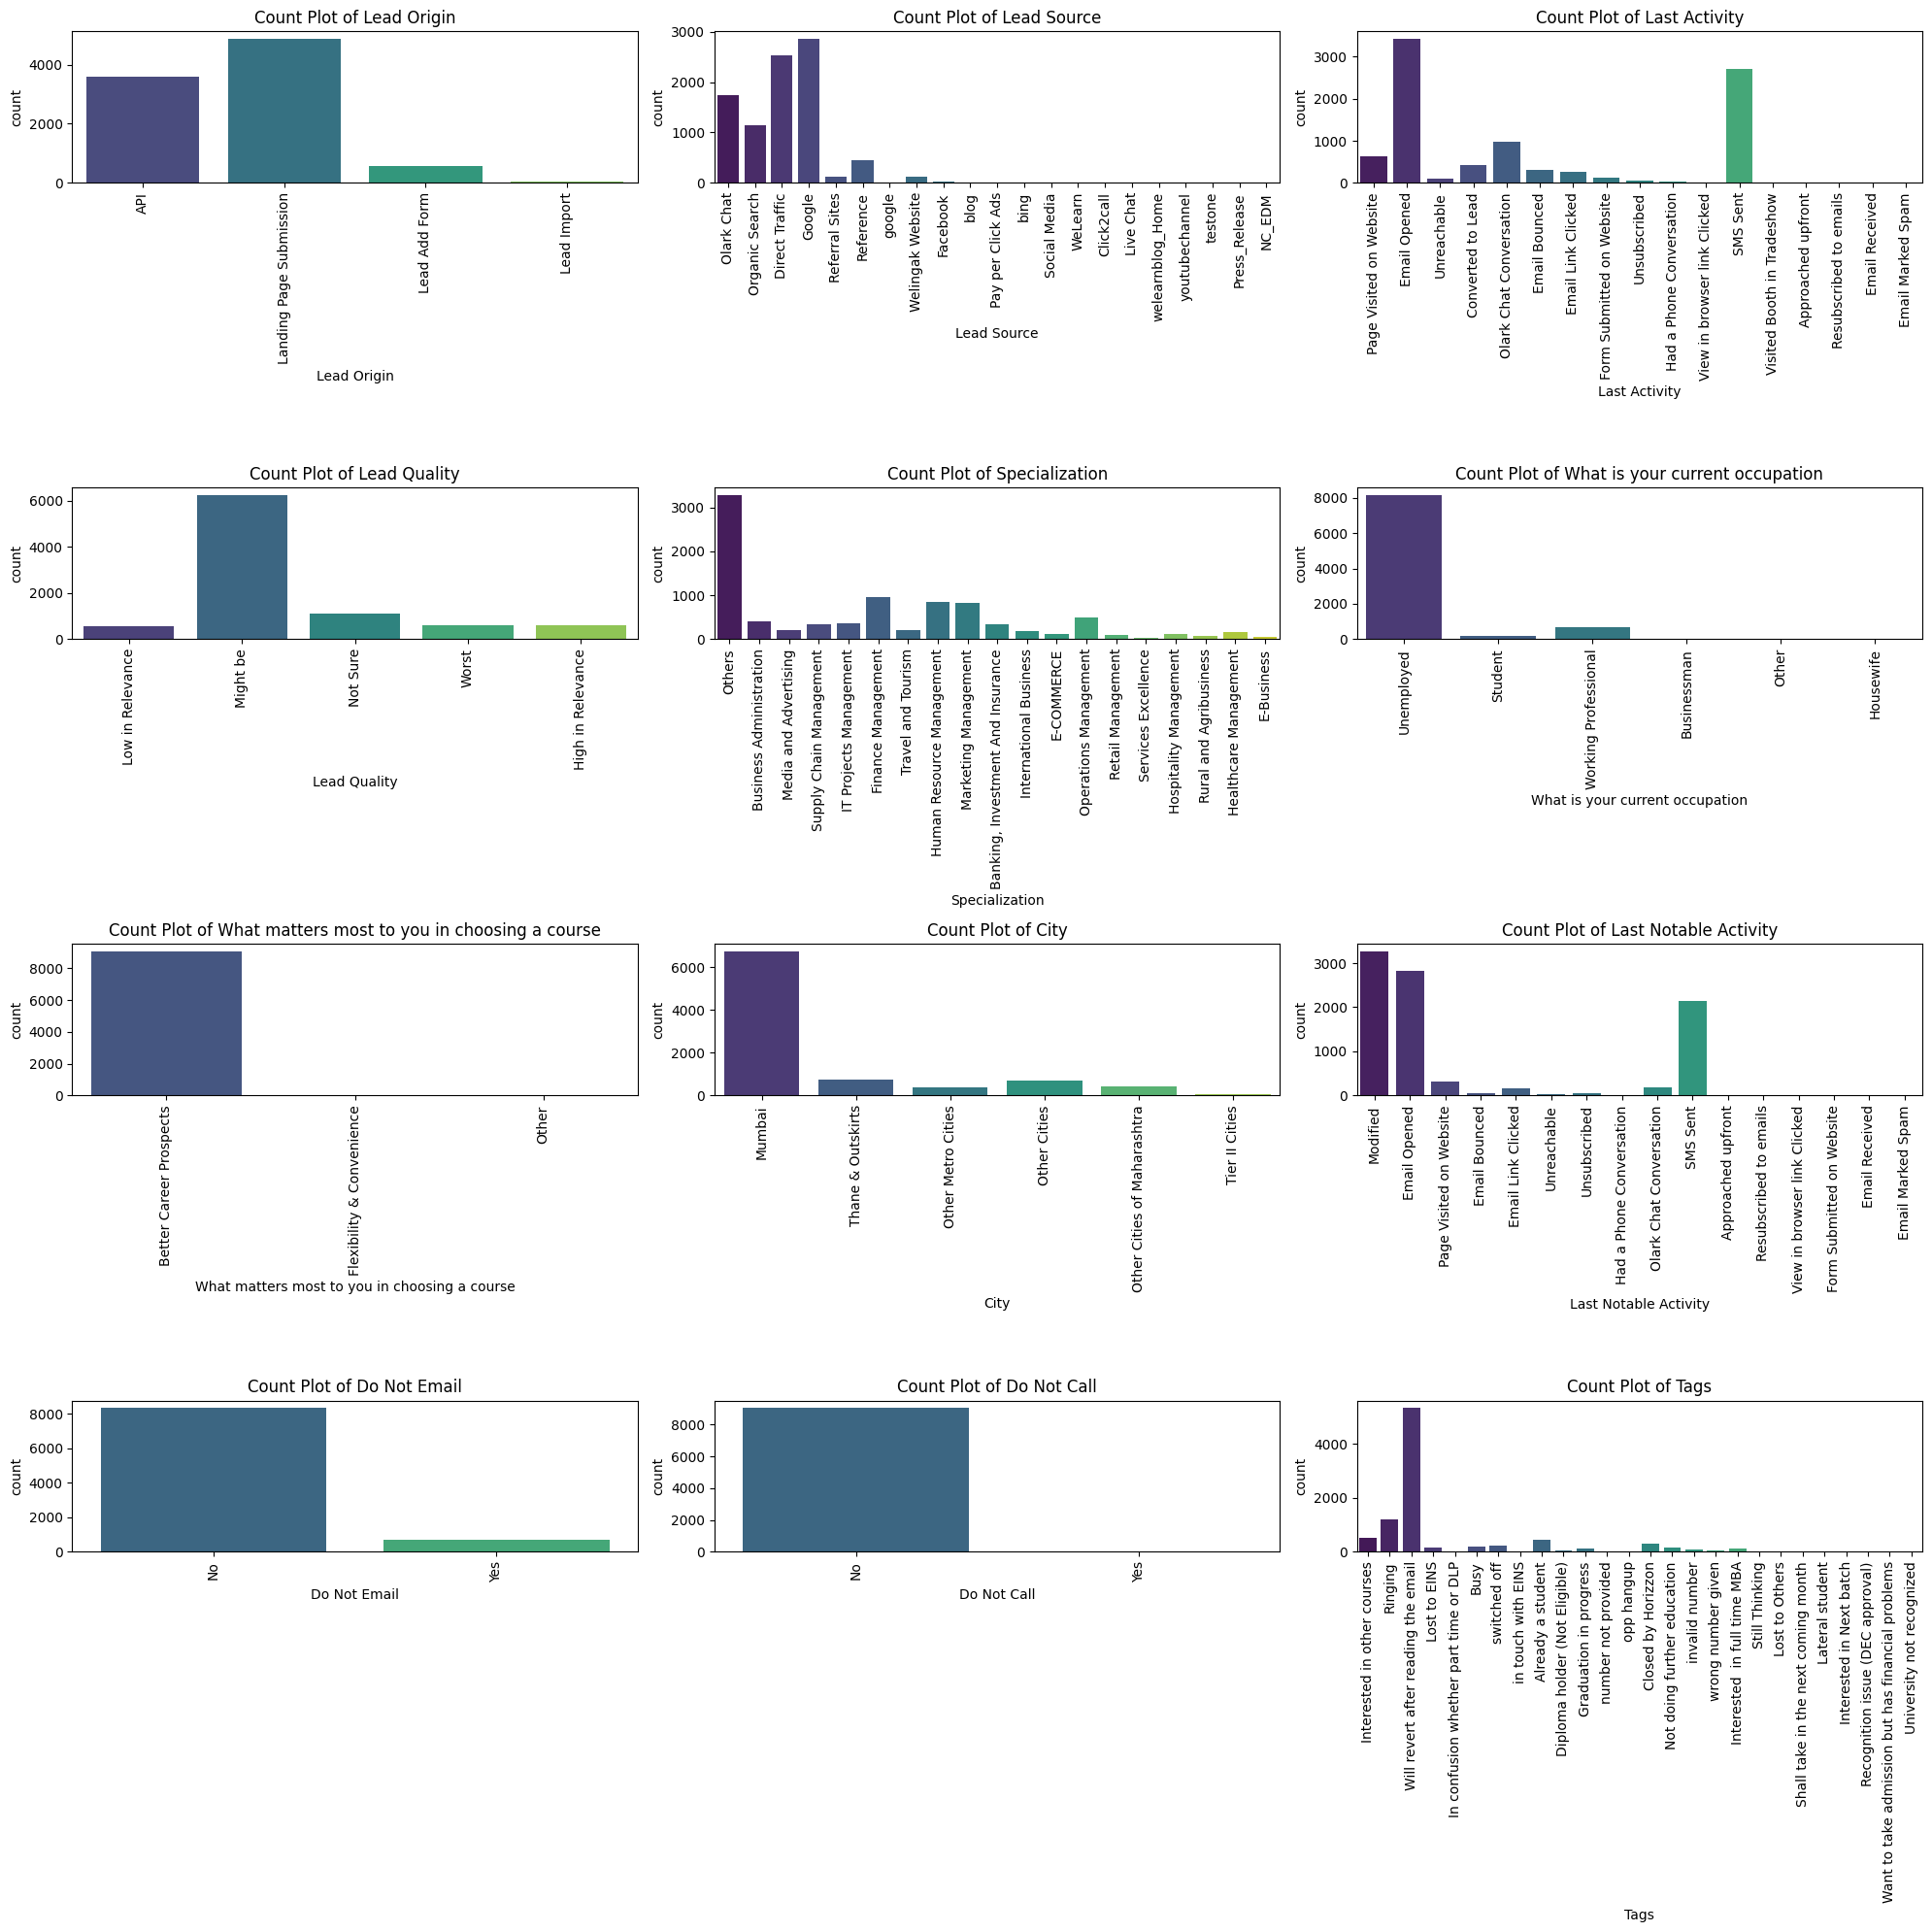

In [31]:
#Let's plot all the categorical columns
categorical_features = ["Lead Origin", "Lead Source", "Last Activity", "Lead Quality", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "City", "Last Notable Activity","Do Not Email","Do Not Call","Tags"]

plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=leads_data, x=feature, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Count Plot of {feature}")

plt.tight_layout()
plt.show()







As it can be observed, for features like Lead Source, Last Activity, Tags, and Last Notable Activity, which have a large number of categories, and where only a few of these categories have a significant frequency, it is a common practice to group the less frequent categories into an 'Others' category.

In [32]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Click2call', 'Live Chat', 'Press_Release',
  'Social Media', 'WeLearn', 'testone', 'welearnblog_Home', 'youtubechannel','NC_EDM'], 'Others')

In [33]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront',
'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


In [34]:
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
'number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month',
'Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems',
 'University not recognized'], 'Other_Tags')


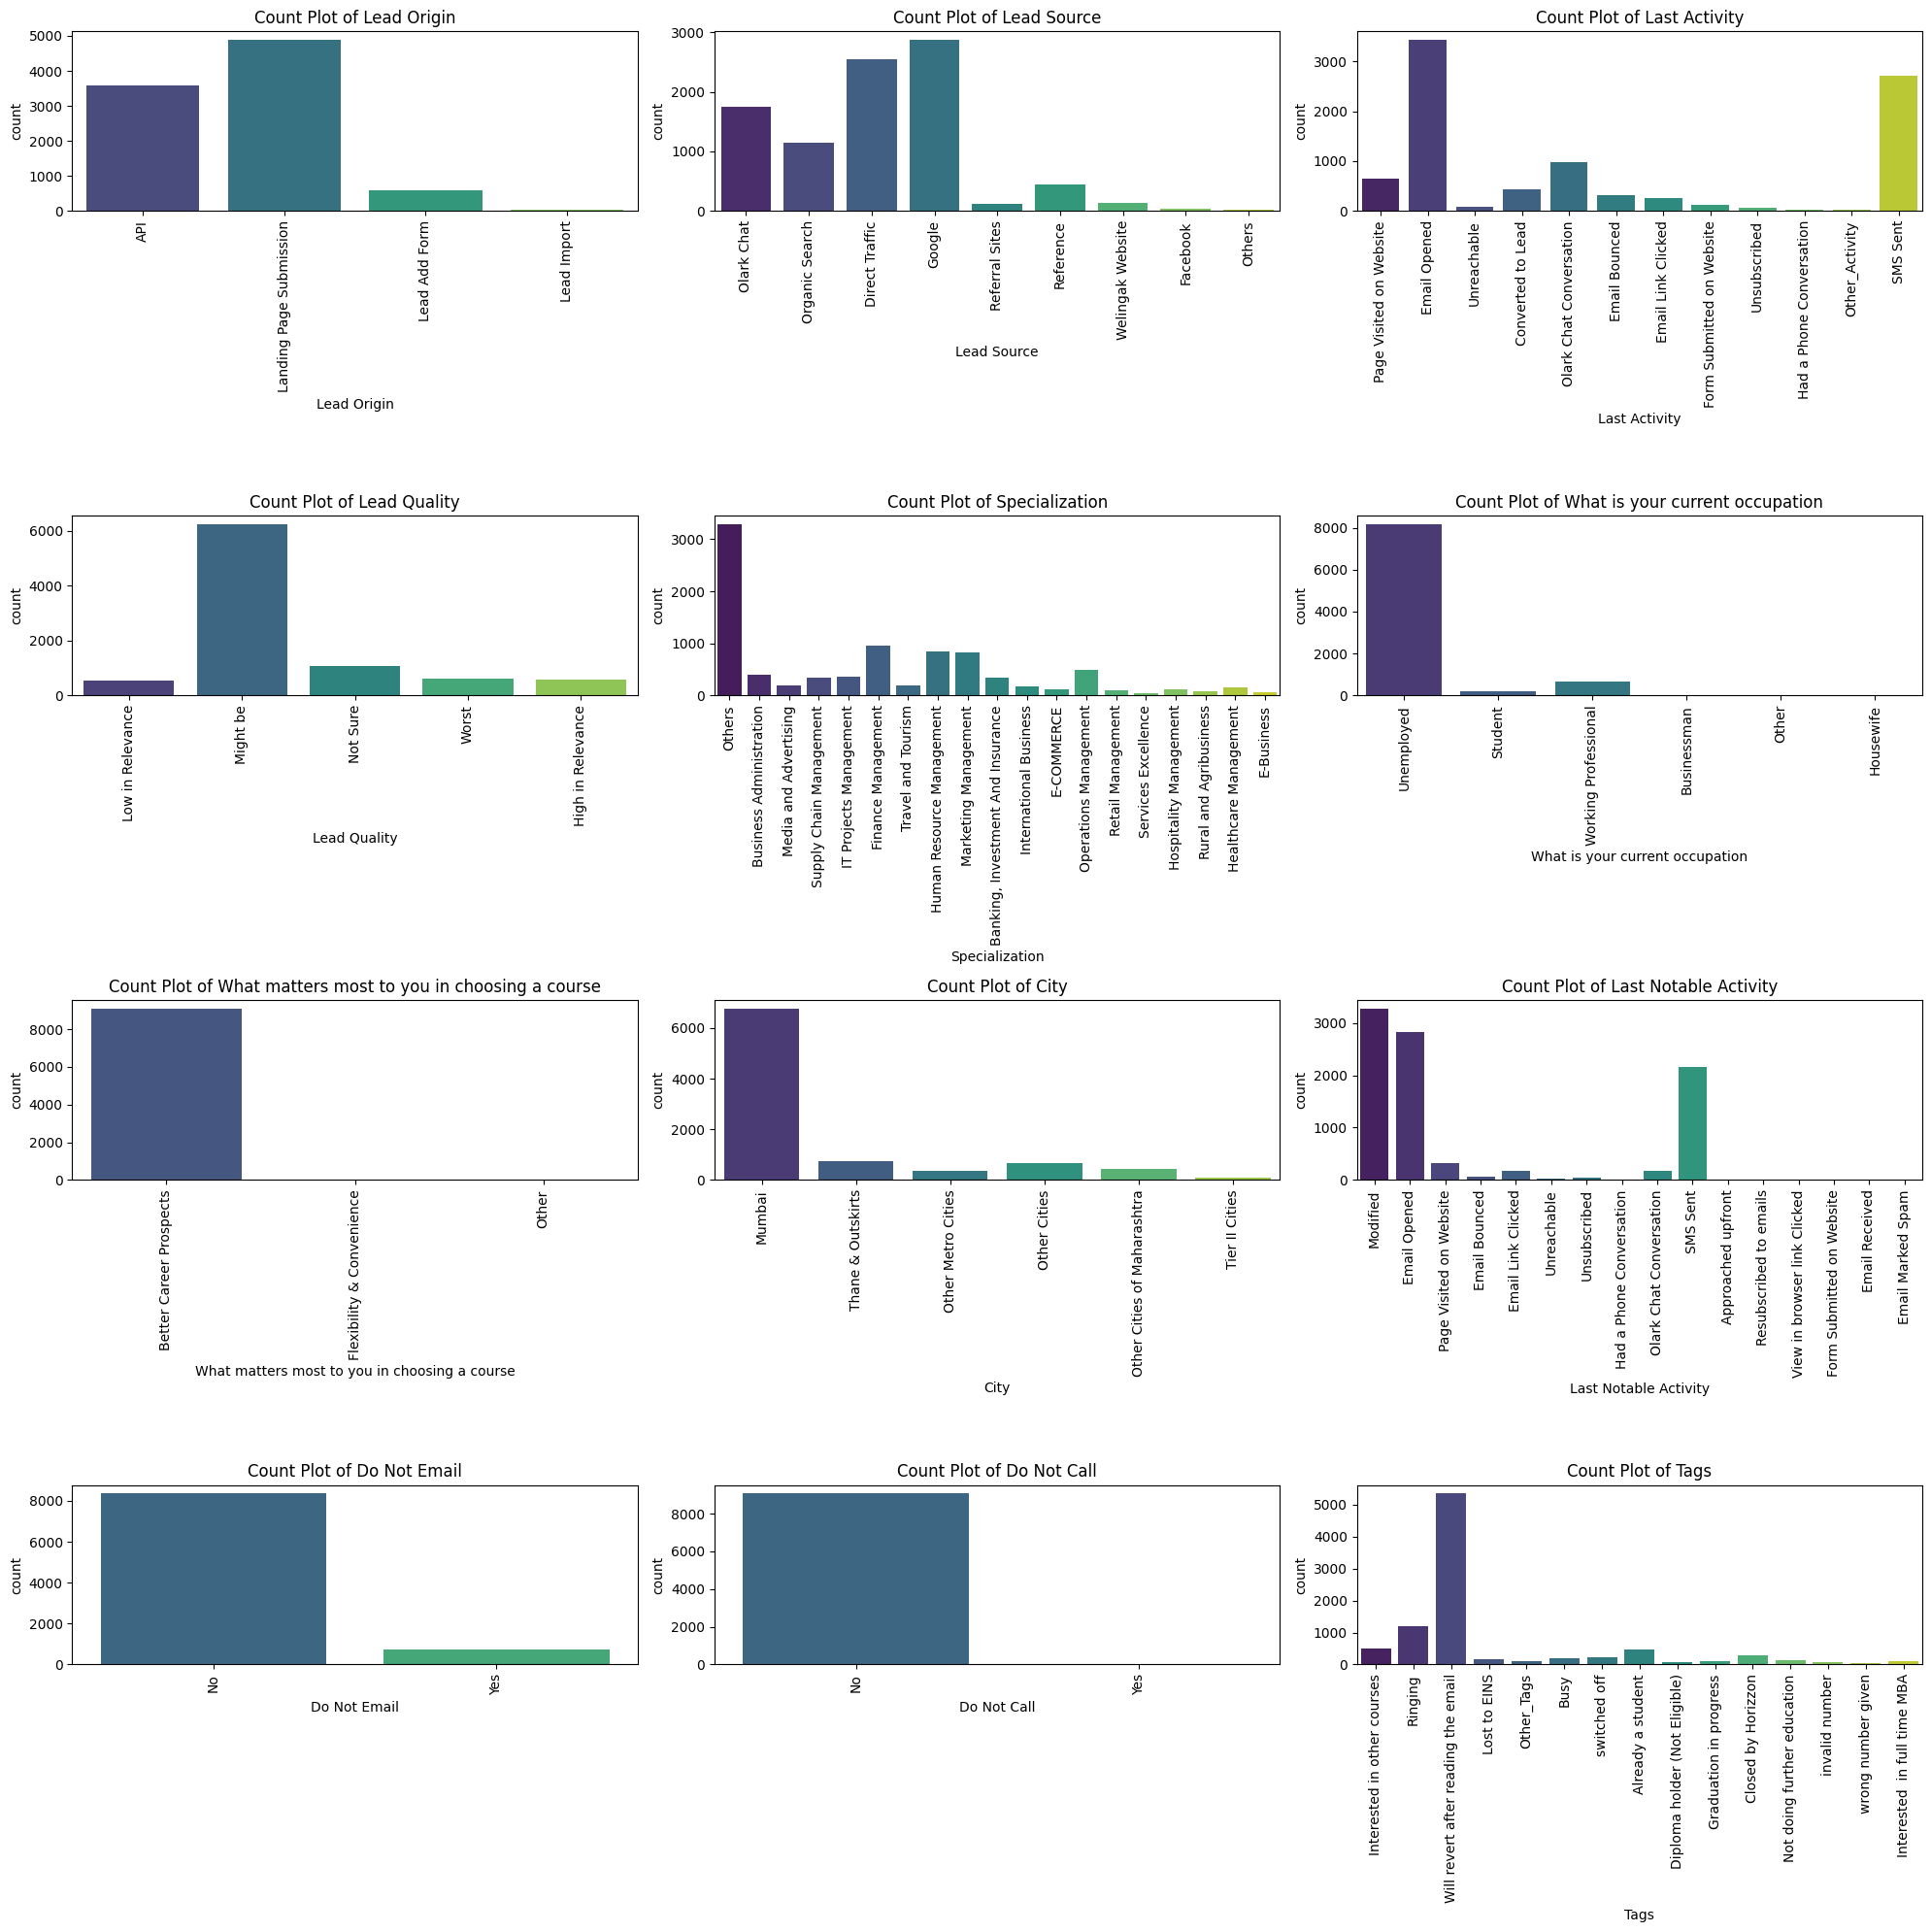

In [35]:
#Let's plot all the categorical columns again
categorical_features = ["Lead Origin", "Lead Source", "Last Activity", "Lead Quality", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "City", "Last Notable Activity","Do Not Email","Do Not Call","Tags"]

plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=leads_data, x=feature, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Count Plot of {feature}")
plt.tight_layout()
plt.show()

In [36]:
#Let's look at info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [37]:
#Statistical summary
leads_data['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

As the 'Country' feature has 8787 out of 9074 values as 'India,' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [38]:
#Statistical summary
leads_data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

As the 'What matters most to you in choosing a course' feature has 9072 out of 9074 values as 'Better Career Prospects' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [39]:
#Statistical summary
leads_data['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

As the 'Search' feature has 9060 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [40]:
#Statistical summary
leads_data['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

As the 'Magazine' feature has 9074 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [41]:
#Statistical summary
leads_data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

As the 'Newspaper Article' feature has 9072 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [42]:
#Statistical summary
leads_data['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

As the 'X Education Forums' feature has 9073 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [43]:
#Statistical summary
leads_data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

As the 'Newspaper' feature has 9073 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [44]:
#Statistical summary
leads_data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

As the 'Digital Advertisement' feature has 9070 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [45]:
#Statistical summary
leads_data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

As the 'Through Recommendations' feature has 9067 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [46]:
#Statistical summary
leads_data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

As the 'Receive More Updates About Our Courses' feature has 9074 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [47]:
#Statistical summary
leads_data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

As the 'Update me on Supply Chain Content' feature has 9074 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [48]:
#Statistical summary
leads_data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

As the 'Get updates on DM Content' feature has 9074 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [49]:
#Statistical summary
leads_data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

As the 'I agree to pay the amount through cheque' feature has 9074 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

In [50]:
#Statistical summary
leads_data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

As the 'I agree to pay the amount through cheque' feature has 6186 out of 9074 values as 'No' and it doesn't provide significant variability or information for our analysis, we can consider dropping this feature.

#Checking Outliers

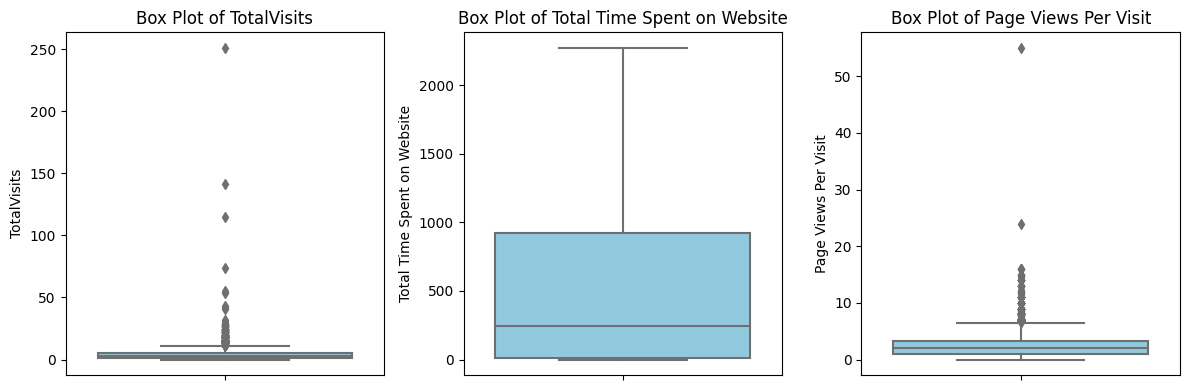

In [51]:
#Let's plot boxplot for all of our numeric variables and also to check outliers
numeric_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

plt.figure(figsize=(12, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=leads_data, y=feature, color="skyblue")
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()

#Bivariate Analysis

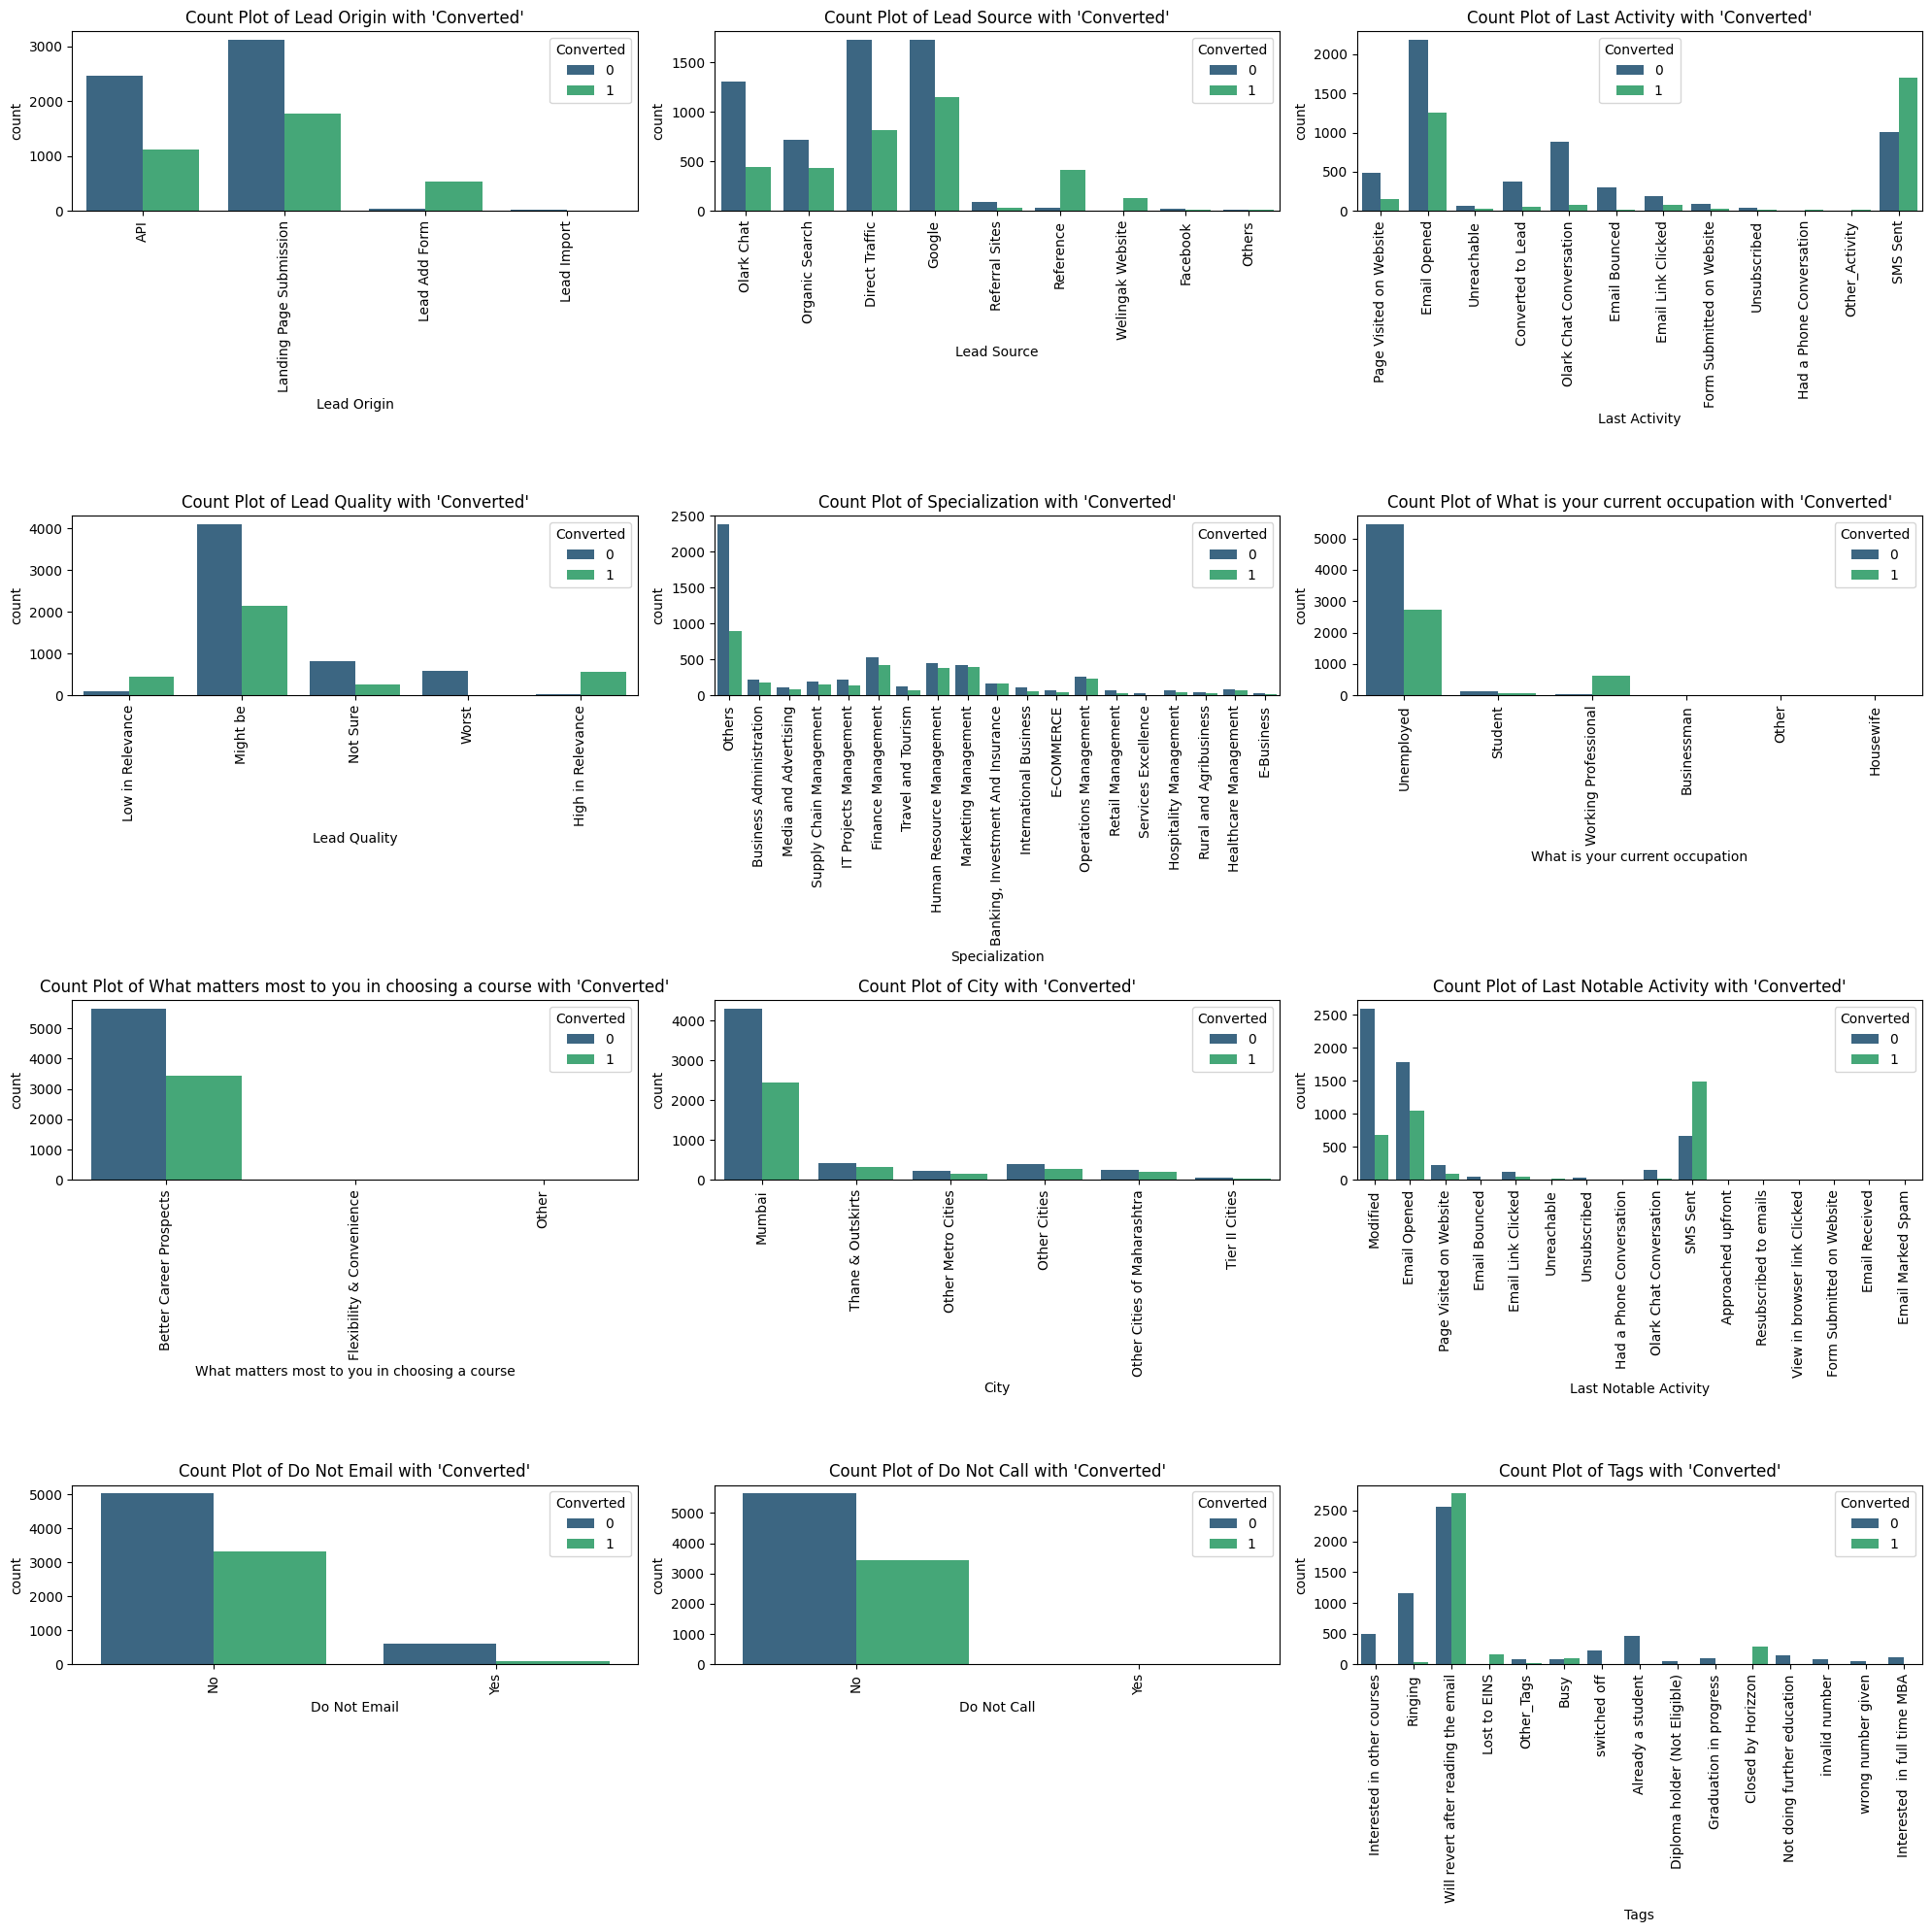

In [52]:
#Lets plot countplot for all the categorical variabes with respect to target feature
categorical_features = ["Lead Origin", "Lead Source", "Last Activity", "Lead Quality", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "City", "Last Notable Activity","Do Not Email","Do Not Call","Tags"]

plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=leads_data, x=feature, hue="Converted", palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Count Plot of {feature} with 'Converted'")

plt.tight_layout()
plt.show()

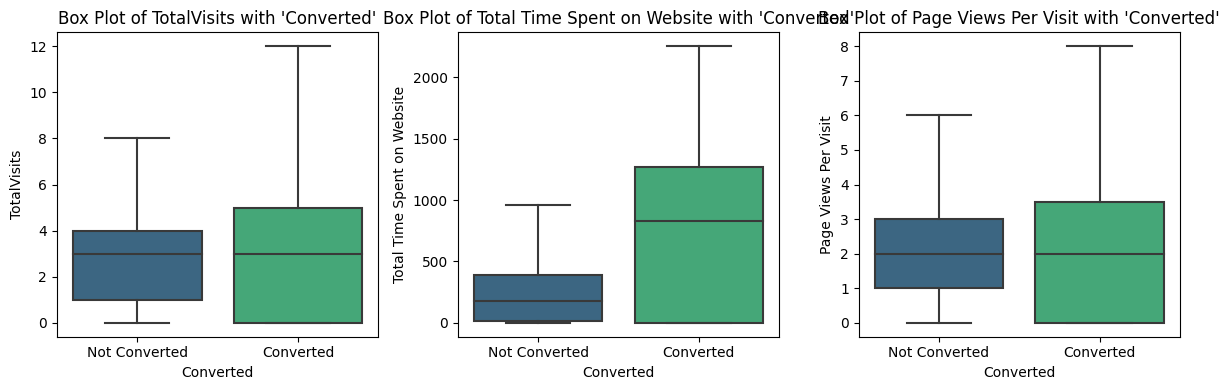

In [53]:
#Lets plot countplot for all the numerical variabes with respect to target feature
numeric_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

plt.figure(figsize=(12, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=leads_data, x="Converted", y=feature, showfliers=False, palette="viridis")
    plt.title(f"Box Plot of {feature} with 'Converted'")
    plt.xticks(ticks=[0, 1], labels=["Not Converted", "Converted"])

plt.tight_layout()
plt.show()

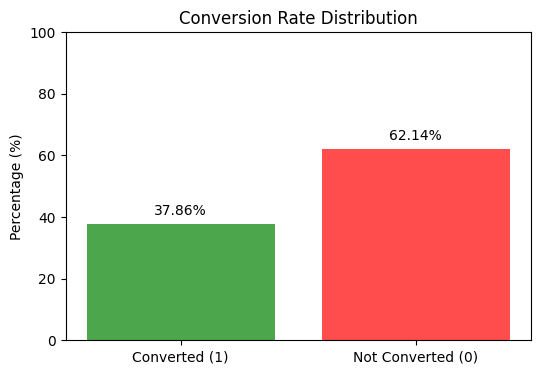

In [54]:
converted_data = leads_data['Converted']

# Calculate the percentages of 1s and 0s
total_samples = len(converted_data)
percentage_1 = (sum(converted_data) / total_samples) * 100
percentage_0 = ((total_samples - sum(converted_data)) / total_samples) * 100

labels = ['Converted (1)', 'Not Converted (0)']
percentages = [percentage_1, percentage_0]

plt.figure(figsize=(6, 4))
plt.bar(labels, percentages, color=['green', 'red'], alpha=0.7)
plt.ylabel('Percentage (%)')
plt.title('Conversion Rate Distribution')
plt.ylim(0, 100)

# Display the percentages on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

Dropping unnecessary Columns

Based on the univariate analysis, it has been observed that several columns do not significantly contribute to the predictive power of the model. Therefore, we are making the decision to drop these columns. Additionally, we are also dropping the 'Lead Number' column as it is unique identifiers and do not provide meaningful information for our predictive model.

In [55]:
leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

<ipython-input-55-919d880ce3a2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',


In [56]:
leads_data.shape

(9074, 16)

In [57]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#Data Preparation

In [58]:
# Converting binary features(Yes/No) to (1/0)
binary_col =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_data[binary_col] = leads_data[binary_col].apply(binary_map)

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [59]:
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media 

In [61]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
'What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [62]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
# Putting response variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
leads_data.isnull().sum()

Prospect ID                                             0
Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_We

In [69]:
# Checking the Converted Rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

We have 37.85% churn rate

#Model Building

Running our First Training Model

In [70]:
import statsmodels.api as sm

In [71]:
# Logistic regression model
logsm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logsm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           88
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1379.4
Date:                Wed, 18 Oct 2023   Deviance:                       2758.8
Time:                        11:18:40   Pearson chi2:                 2.95e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.9515   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.5893      0.299     -5.320      0.000      -2.175      -1.004
Do Not Call                                             22.0764   1.48e+05      0.000      1.000   -2.91e+05    2.91e+05
TotalVisits                                              0.1315      0.037      3.545      0.000       0.059       0.204
Total Time Spent on Website                              1.1413      0.060     18.969      0.000       1.023       1.259
Page Views Per Visit                                    -0.1044      0.071     -1.477      0.140      -0.243       0.034
Lead Origin_Landing Page Submission                     -1.0821      0.207     -5.228      0.000      -1.488      -0.676
Lead Origin_Lead Add Form                               -0.0358      1.201     -0.030      0.976      -2.389       2.318
Lead Origin_Lead Import                                 27.4339   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.0239   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2273      0.143      1.593      0.111      -0.052       0.507
Lead Source_Olark Chat                                   0.9374      0.217      4.329      0.000       0.513       1.362
Lead Source_Organic Search                               0.1249      0.196      0.638      0.524      -0.259       0.509
Lead Source_Others                                       0.7681      0.764      1.005      0.315      -0.729       2.266
Lead Source_Reference                                    2.4658      1.256      1.963      0.050       0.004       4.928
Lead Source_Referral Sites                               0.0325      0.445      0.073      0.942      -0.839       0.904
Lead Source_Welingak Website                             5.1311      1.413      3.630      0.000       2.361       7.901
Last Activity_Email Bounced                             -0.3593      0.824     -0.436      0.663      -1.973       1.255
Last Activity_Email Link Clicked                         0.5501      0.656      0.839      0.402      -0.736       1.836
Last Activity_Email Opened                              -0.0085      0.368     -0.023      0.982      -0.729       0.712
Last Activity_Form Submitted on Website                  0.0496      0.572      0.087      0.931      -1.072       1.171
Last Activity_Had a Phone Conversation                   3.3680      2.444      1.378      0.168      -1.422       8.158
Last Activity_Olark Chat Conversation                   -0

Feature Selection Using RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)

In [73]:
from sklearn.feature_selection import RFE

# Create your logistic regression model (logreg) before using RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)  # Select 15 features

# Fit RFE on your training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=15)

In [74]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 49),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 62),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 63),
 ('Lead Source_Others', False, 51),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 69),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 46),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 65),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other_Activity', False, 16),
 ('Last Activity_Page Vi

In [76]:
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manag

Assessing the model with StatsModels

In [78]:
X_train_sm = sm.add_constant(X_train[cols])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1788.2
Date:                Wed, 18 Oct 2023   Deviance:                       3576.4
Time:                        11:18:49   Pearson chi2:                 2.30e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5369
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9917      0.252     -7.889      0.000      -2.487      -1.497
Lead Origin_Lead Add Form                                1.8479      0.329      5.610      0.000       1.202       2.493
Lead Source_Welingak Website                             2.3131      0.796      2.907      0.004       0.754       3.872
Last Activity_Had a Phone Conversation                   3.0001      0.896      3.349      0.001       1.244       4.756
What is your current occupation_Working Professional     2.6006      0.233     11.181      0.000       2.145       3.056
Tags_Busy                                                2.7989      0.341      8.197      0.000       2.130       3.468
Tags_Closed by Horizzon                                  8.3832      0.771     10.878      0.000       6.873       9.894
Tags_Lost to EINS                                        9.2981      0.760     12.232      0.000       7.808      10.788
Tags_Ringing                                            -1.3904      0.346     -4.019      0.000      -2.069      -0.712
Tags_Will revert after reading the email                 4.4307      0.259     17.080      0.000       3.922       4.939
Tags_invalid number                                    -21.4881    1.4e+04     -0.002      0.999   -2.75e+04    2.75e+04
Tags_switched off                                       -1.4122      0.583     -2.424      0.015      -2.554      -0.270
Lead Quality_Might be                                   -3.6889      0.200    -18.467      0.000      -4.080      -3.297
Lead Quality_Not Sure                                   -1.6731      0.273     -6.139      0.000      -2.207      -1.139
Lead Quality_Worst                                      -4.0075      0.871     -4.601      0.000      -5.715      -2.300
Last Notable Activity_SMS Sent                           2.9932      0.114     26.184      0.000       2.769       3.217
========================================================================================================================
"""

In [79]:
# Removing Tags_invalid number column as it p value is greater than 5 % which suggest it is insignificant
cols2 = cols.drop('Tags_invalid number')


In [80]:
X_train_sm = sm.add_constant(X_train[cols2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1791.5
Date:                Wed, 18 Oct 2023   Deviance:                       3582.9
Time:                        11:18:49   Pearson chi2:                 2.32e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0839      0.253     -8.245      0.000      -2.579      -1.589
Lead Origin_Lead Add Form                                1.8524      0.330      5.620      0.000       1.206       2.498
Lead Source_Welingak Website                             2.3084      0.796      2.901      0.004       0.749       3.868
Last Activity_Had a Phone Conversation                   2.9971      0.895      3.347      0.001       1.242       4.752
What is your current occupation_Working Professional     2.6210      0.234     11.198      0.000       2.162       3.080
Tags_Busy                                                2.9483      0.338      8.727      0.000       2.286       3.610
Tags_Closed by Horizzon                                  8.5018      0.770     11.038      0.000       6.992      10.011
Tags_Lost to EINS                                        9.4256      0.760     12.404      0.000       7.936      10.915
Tags_Ringing                                            -1.2344      0.342     -3.614      0.000      -1.904      -0.565
Tags_Will revert after reading the email                 4.5529      0.257     17.693      0.000       4.049       5.057
Tags_switched off                                       -1.2528      0.580     -2.161      0.031      -2.389      -0.117
Lead Quality_Might be                                   -3.7176      0.202    -18.448      0.000      -4.113      -3.323
Lead Quality_Not Sure                                   -1.7297      0.272     -6.356      0.000      -2.263      -1.196
Lead Quality_Worst                                      -4.0915      0.867     -4.721      0.000      -5.790      -2.393
Last Notable Activity_SMS Sent                           2.9765      0.113     26.226      0.000       2.754       3.199
========================================================================================================================
"""

In [81]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.35
4,Tags_Busy,1.20
10,Lead Quality_Might be,1.17
5,Tags_Closed by Horizzon,1.15
6,Tags_Lost to EINS,1.08
9,Tags_switched off,1.04
2,Last Activity_Had a Phone Conversation,1.01
0,Lead Origin_Lead Add Form,0.66
3,What is your current occupation_Working Profes...,0.56
12,Lead Quality_Worst,0.50


As Vif value of all features are below 5% we can say these features have no multicollinearity issue

In [83]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.222934
1012    0.797764
9226    0.006381
4750    0.849131
7987    0.996359
1281    0.849131
2880    0.222934
4971    0.891977
7536    0.921933
1248    0.000879
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.22934442e-01, 7.97763744e-01, 6.38094713e-03, 8.49131207e-01,
       9.96359261e-01, 8.49131207e-01, 2.22934442e-01, 8.91976642e-01,
       9.21933066e-01, 8.78990111e-04])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
0,0,0.222934,3009
1,0,0.797764,1012
2,0,0.006381,9226
3,1,0.849131,4750
4,1,0.996359,7987


In [86]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted
0,0,0.222934,3009,0
1,0,0.797764,1012,1
2,0,0.006381,9226,0
3,1,0.849131,4750,1
4,1,0.996359,7987,1


In [87]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3754  151]
 [ 498 1948]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8978113682884585


#Metrics Beyond Simple Accuracy

In [89]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7964022894521668

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9613316261203585

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038668373879641484


In [93]:
# positive predictive value
print (TP / float(TP+FP))

0.9280609814197237


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8828786453433678


#Plotting the ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

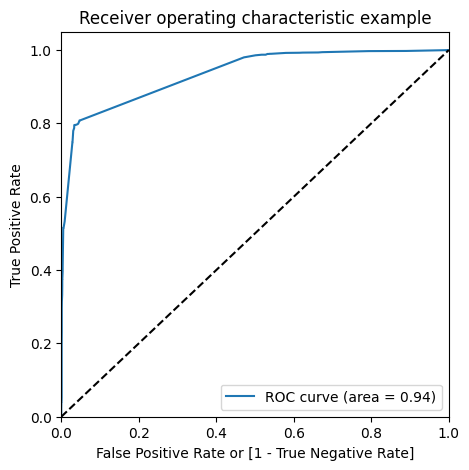

In [97]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

An ROC of 94 indicates that our model has a strong ability to discriminate between the classes.

#Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.222934,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.797764,1012,1,1,1,1,1,1,1,1,1,0,0
2,0,0.006381,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.849131,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.996359,7987,1,1,1,1,1,1,1,1,1,1,1


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.672650  0.987326  0.475544
0.2   0.2  0.702094  0.980376  0.527785
0.3   0.3  0.895764  0.798855  0.956466
0.4   0.4  0.897496  0.796402  0.960819
0.5   0.5  0.897811  0.796402  0.961332
0.6   0.6  0.899386  0.795585  0.964405
0.7   0.7  0.896079  0.779231  0.969270
0.8   0.8  0.885215  0.748160  0.971063
0.9   0.9  0.809636  0.515127  0.994110


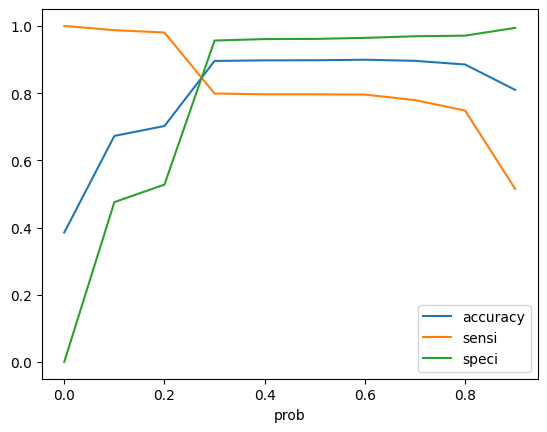

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.222934,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.797764,1012,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.006381,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.849131,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.996359,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8957644465438513

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7964022894521668

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.9613316261203585

In [105]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.038668373879641484


In [106]:
# Positive predictive value
print (TP / float(TP+FP))

0.9280609814197237


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8828786453433678


#Precision and Recall

In [108]:
# Precision TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9280609814197237

In [109]:
# Recall TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7964022894521668

#Precision and recall tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

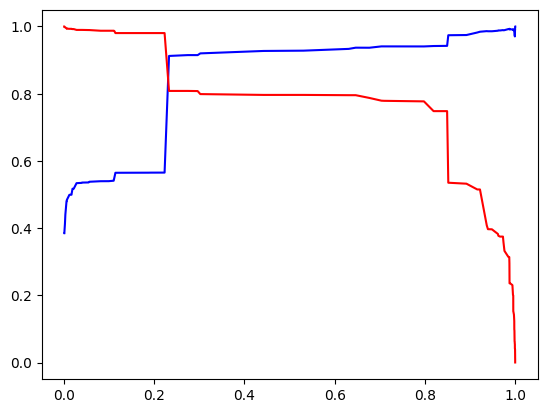

In [113]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#Making Prediction on Test Set

In [114]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
X_test = X_test[cols2]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [116]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [117]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.222934
1490    0.993879
7936    0.222934
4216    0.999744
3830    0.222934
1800    0.993879
6507    0.111889
4821    0.000863
4223    0.999323
4714    0.222934
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.222934
1490,0.993879
7936,0.222934
4216,0.999744
3830,0.222934


In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [120]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [121]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ProspectID,0
0,0,3271,0.222934
1,1,1490,0.993879
2,0,7936,0.222934
3,1,4216,0.999744
4,0,3830,0.222934


In [123]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [124]:
y_pred_final = y_pred_final.reset_index(drop=True)
y_pred_final.head()

,Converted,ProspectID,Converted_Prob
0,0,3271,0.222934
1,1,1490,0.993879
2,0,7936,0.222934
3,1,4216,0.999744
4,0,3830,0.222934


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,ProspectID,Converted_Prob,final_predicted
0,0,3271,0.222934,0
1,1,1490,0.993879,1
2,0,7936,0.222934,0
3,1,4216,0.999744,1
4,0,3830,0.222934,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8949687844289387

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7964022894521668

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.9613316261203585